In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_csv('electricity_dah_prices.csv')
df.head()

,date,hour,france,italy,belgium,spain,uk,germany
0,2022/01/01,00:00 - 01:00,89.06,170.28,82.02,145.86,0.27,50.05
1,2022/01/01,01:00 - 02:00,78.48,155.72,67.07,114.90,-0.01,41.33
2,2022/01/01,02:00 - 03:00,85.16,147.09,75.11,113.87,0.27,43.22
3,2022/01/01,03:00 - 04:00,50.00,91.00,50.91,97.80,-0.01,45.46
4,2022/01/01,04:00 - 05:00,37.67,104.00,37.67,97.80,-0.01,37.67


In [3]:
# Check the data types and number of rows/columns
print(df.info())

# Check the summary statistics of the data
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     8761 non-null   object 
 1   hour     8761 non-null   object 
 2   france   8760 non-null   float64
 3   italy    8760 non-null   float64
 4   belgium  8760 non-null   float64
 5   spain    8760 non-null   float64
 6   uk       7319 non-null   float64
 7   germany  8760 non-null   float64
dtypes: float64(6), object(2)
memory usage: 547.7+ KB
None
            france        italy      belgium        spain           uk  \
count  8760.000000  8760.000000  8760.000000  8760.000000  7319.000000   
mean    275.878425   307.581382   244.531733   167.521917   223.205879   
std     145.825722   136.959856   134.657307    69.441349   112.921872   
min      -1.440000     1.000000  -100.000000     0.000000   -30.000000   
25%     183.030000   211.875000   157.717500   125.000000   146.000000   
50%     239

In [4]:
df.corr()

,france,italy,belgium,spain,uk,germany
france,1.000000,0.905206,0.871286,0.210219,0.753229,0.859217
italy,0.905206,1.000000,0.845695,0.131930,0.763865,0.844505
belgium,0.871286,0.845695,1.000000,0.218180,0.757588,0.954275
spain,0.210219,0.131930,0.218180,1.000000,0.296733,0.171934
uk,0.753229,0.763865,0.757588,0.296733,1.000000,0.717038
germany,0.859217,0.844505,0.954275,0.171934,0.717038,1.000000


<AxesSubplot:>

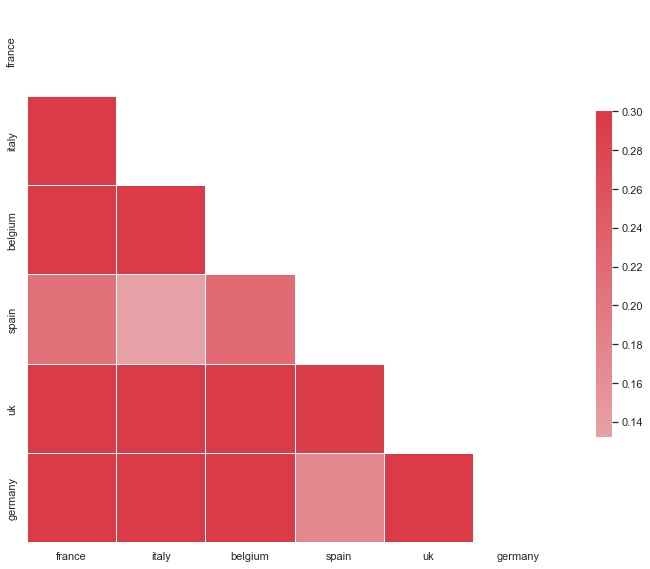

In [5]:
#Correlation
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [6]:
#Finding categorical columns in dataset
df.select_dtypes(include='object').columns

Index(['date', 'hour'], dtype='object')

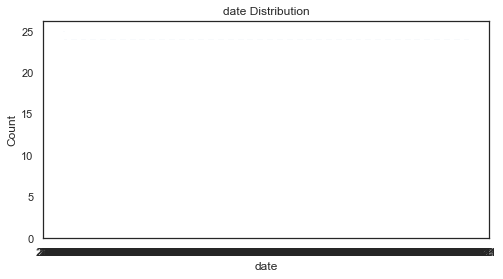

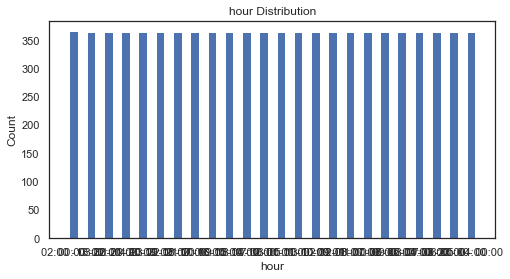

In [7]:
cat_col = df.select_dtypes(include='object').columns
for i, column in enumerate(cat_col):
    counts = df[column].value_counts()
    plt.figure(figsize=(8,4))
    plt.bar(counts.index, counts.values,width=0.5)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('{} Distribution'.format(column))

In [8]:
#Finding numerical columns in dataset
df.select_dtypes(exclude='object').columns

Index(['france', 'italy', 'belgium', 'spain', 'uk', 'germany'], dtype='object')

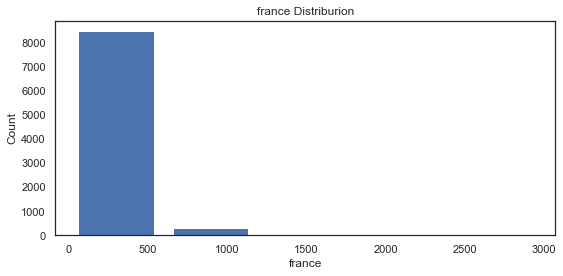

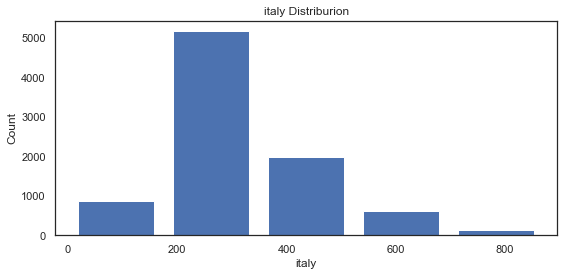

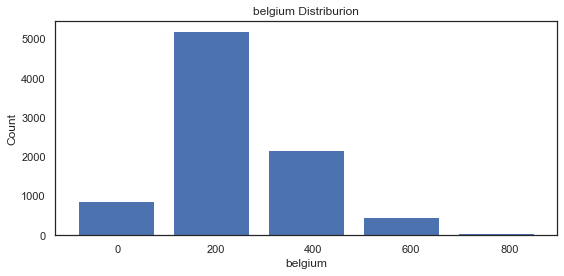

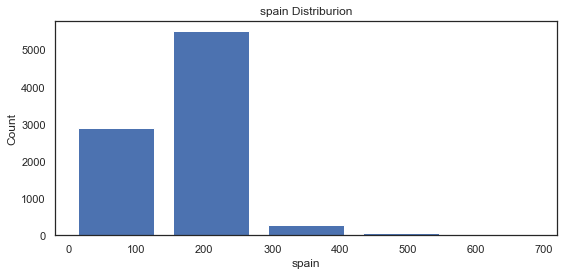

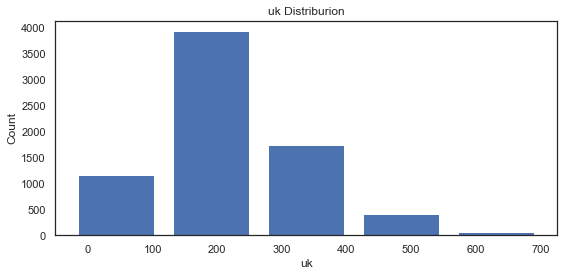

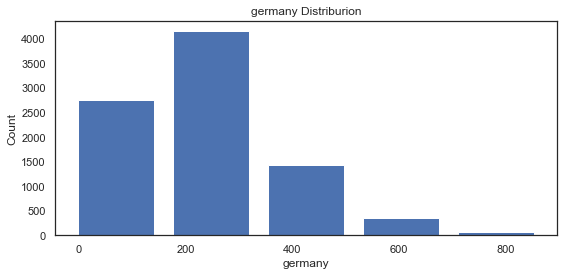

In [9]:
num_col = df.select_dtypes(exclude='object').columns
for i, column in enumerate(num_col):
    plt.figure(figsize=(8,4))
    plt.hist(df[column],bins=5, rwidth=0.8)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('{} Distriburion'.format(column))
    plt.tight_layout()
    plt.show()

In [10]:
# Check for missing values
print(df.isnull().sum())


date          0
hour          0
france        1
italy         1
belgium       1
spain         1
uk         1442
germany       1
dtype: int64


In [11]:
# replace missing values with mean value for each column
df = df.fillna(df.mean())

In [12]:
df.isnull().sum()

date       0
hour       0
france     0
italy      0
belgium    0
spain      0
uk         0
germany    0
dtype: int64

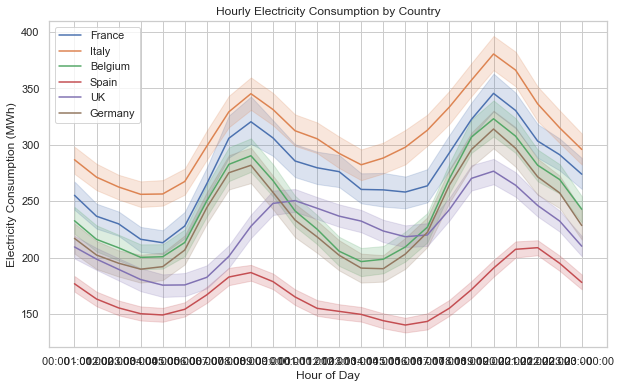

In [13]:
# Line plot for each country
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='hour', y='france', label='France')
sns.lineplot(data=df, x='hour', y='italy', label='Italy')
sns.lineplot(data=df, x='hour', y='belgium', label='Belgium')
sns.lineplot(data=df, x='hour', y='spain', label='Spain')
sns.lineplot(data=df, x='hour', y='uk', label='UK')
sns.lineplot(data=df, x='hour', y='germany', label='Germany')
plt.title('Hourly Electricity Consumption by Country')
plt.xlabel('Hour of Day')
plt.ylabel('Electricity Consumption (MWh)')
plt.legend()
plt.show()

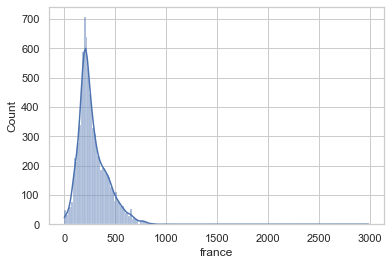

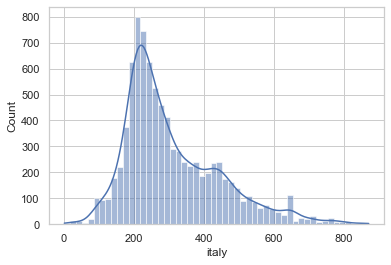

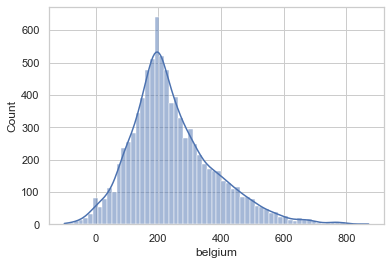

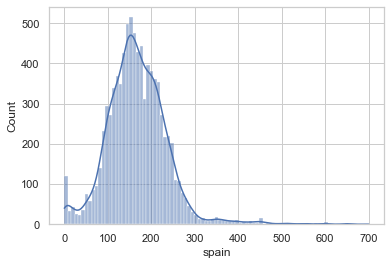

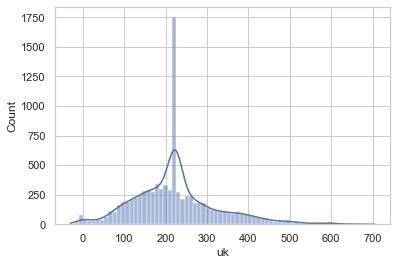

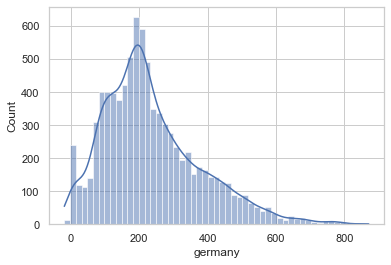

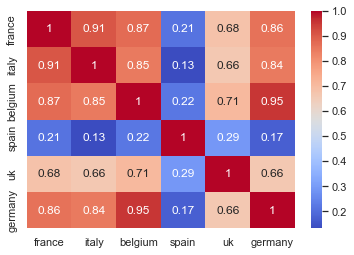

In [14]:
# compute summary statistics
summary_stats = df[['france', 'italy', 'belgium', 'spain', 'uk', 'germany']].describe()

# visualize distributions
sns.histplot(data=df, x='france', kde=True)
plt.show()

sns.histplot(data=df, x='italy', kde=True)
plt.show()

sns.histplot(data=df, x='belgium', kde=True)
plt.show()

sns.histplot(data=df, x='spain', kde=True)
plt.show()

sns.histplot(data=df, x='uk', kde=True)
plt.show()

sns.histplot(data=df, x='germany', kde=True)
plt.show()

# compute correlations
corr_matrix = df[['france', 'italy', 'belgium', 'spain', 'uk', 'germany']].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

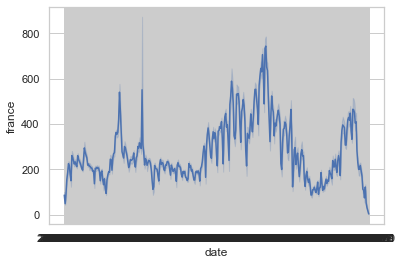

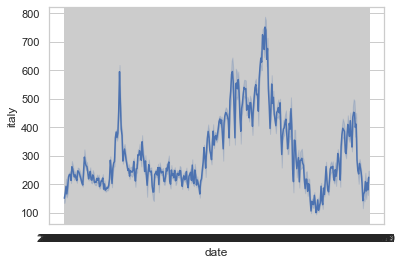

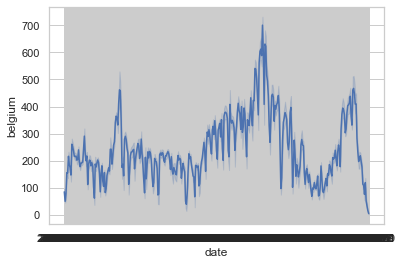

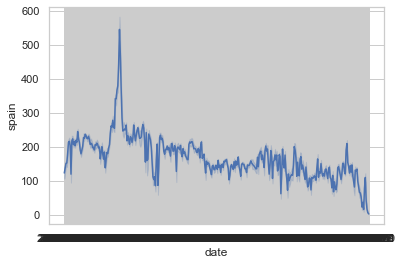

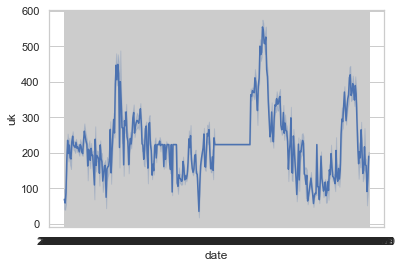

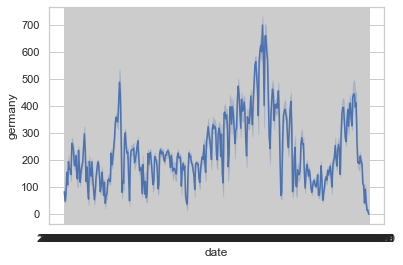

In [15]:
# visualize trends
sns.lineplot(data=df, x='date', y='france')
plt.show()

sns.lineplot(data=df, x='date', y='italy')
plt.show()

sns.lineplot(data=df, x='date', y='belgium')
plt.show()

sns.lineplot(data=df, x='date', y='spain')
plt.show()

sns.lineplot(data=df, x='date', y='uk')
plt.show()

sns.lineplot(data=df, x='date', y='germany')
plt.show()

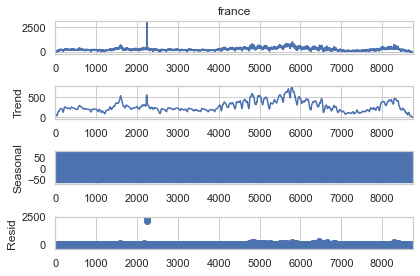

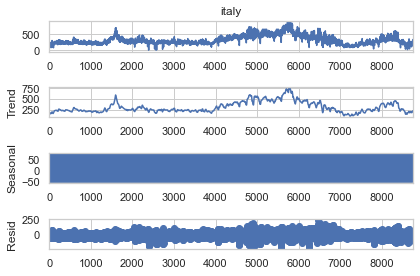

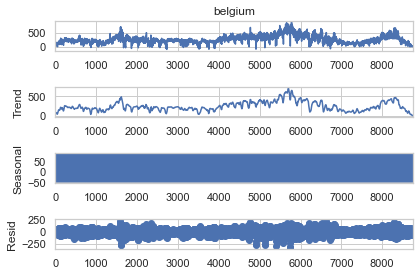

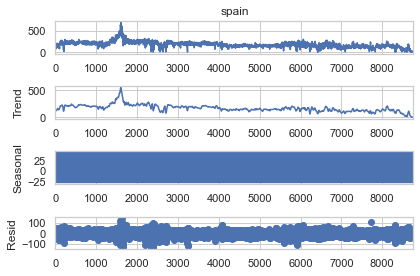

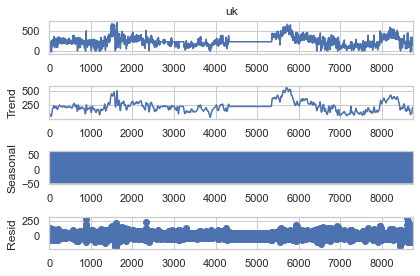

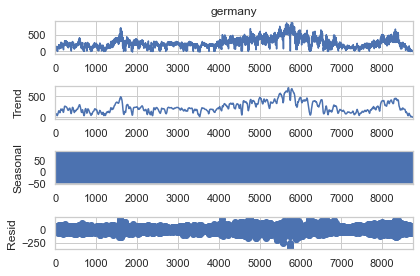

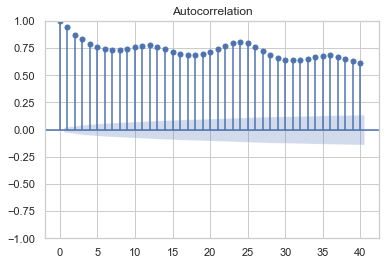

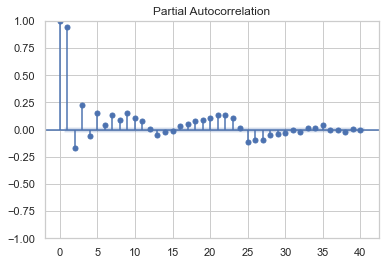

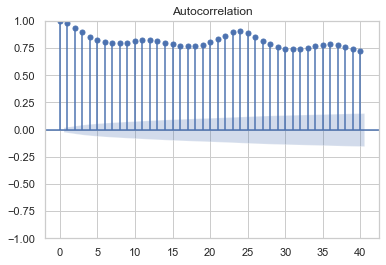

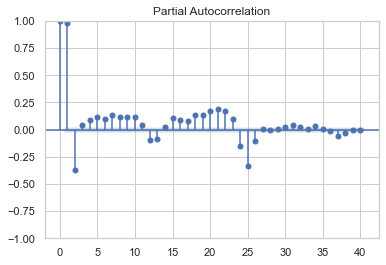

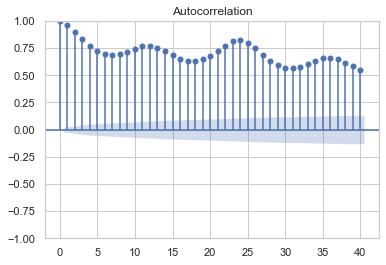

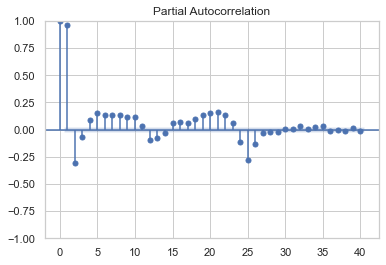

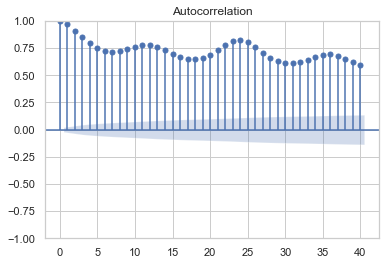

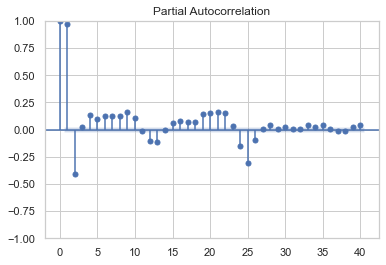

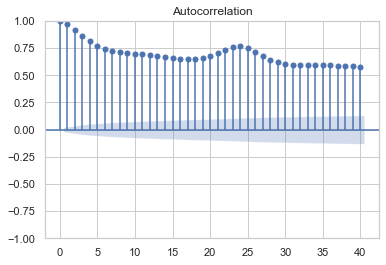

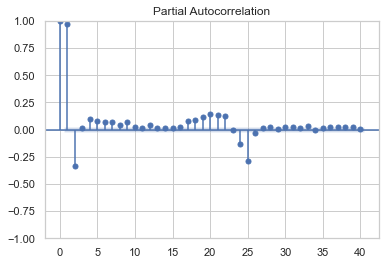

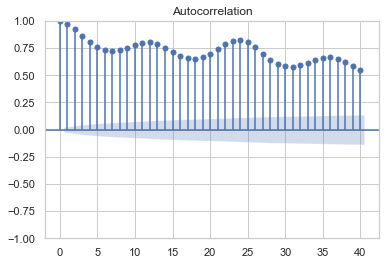

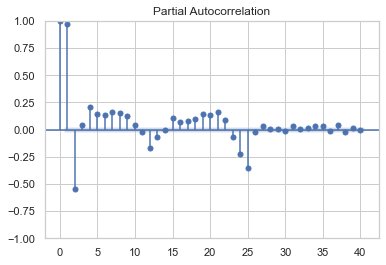

In [16]:
# decompose time series
decomposition = seasonal_decompose(df['france'], period=24)
fig = decomposition.plot()
plt.show()

decomposition = seasonal_decompose(df['italy'], period=24)
fig = decomposition.plot()
plt.show()

decomposition = seasonal_decompose(df['belgium'], period=24)
fig = decomposition.plot()
plt.show()

decomposition = seasonal_decompose(df['spain'], period=24)
fig = decomposition.plot()
plt.show()

decomposition = seasonal_decompose(df['uk'], period=24)
fig = decomposition.plot()
plt.show()

decomposition = seasonal_decompose(df['germany'], period=24)
fig = decomposition.plot()
plt.show()

# compute autocorrelation and partial autocorrelation

plot_acf(df['france'])
plt.show()

plot_pacf(df['france'])
plt.show()

plot_acf(df['italy'])
plt.show()

plot_pacf(df['italy'])
plt.show()

plot_acf(df['belgium'])
plt.show()

plot_pacf(df['belgium'])
plt.show()

plot_acf(df['spain'])
plt.show()

plot_pacf(df['spain'])
plt.show()

plot_acf(df['uk'])
plt.show()

plot_pacf(df['uk'])
plt.show()

plot_acf(df['germany'])
plt.show()

plot_pacf(df['germany'])
plt.show()

In [17]:
import datetime

# combine the date and hour columns into a single datetime column
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['hour'].str.split(' - ', expand=True)[0])

# set the datetime column as the index of the dataframe
df.set_index('datetime', inplace=True)

# drop the original date and hour columns
df.drop(['date', 'hour'], axis=1, inplace=True)

# extract information from the datetime column
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['hour'] = df.index.hour

# example: get the energy consumption for Italy at 3am on January 1st, 2022
italy_consumption = df.loc[datetime.datetime(2022, 1, 1, 3), 'italy']
print(italy_consumption)

91.0


In [18]:
df.head()

,france,italy,belgium,spain,uk,germany,year,month,day,hour
datetime,,,,,,,,,,
2022-01-01 00:00:00,89.06,170.28,82.02,145.86,0.27,50.05,2022,1,1,0
2022-01-01 01:00:00,78.48,155.72,67.07,114.90,-0.01,41.33,2022,1,1,1
2022-01-01 02:00:00,85.16,147.09,75.11,113.87,0.27,43.22,2022,1,1,2
2022-01-01 03:00:00,50.00,91.00,50.91,97.80,-0.01,45.46,2022,1,1,3
2022-01-01 04:00:00,37.67,104.00,37.67,97.80,-0.01,37.67,2022,1,1,4


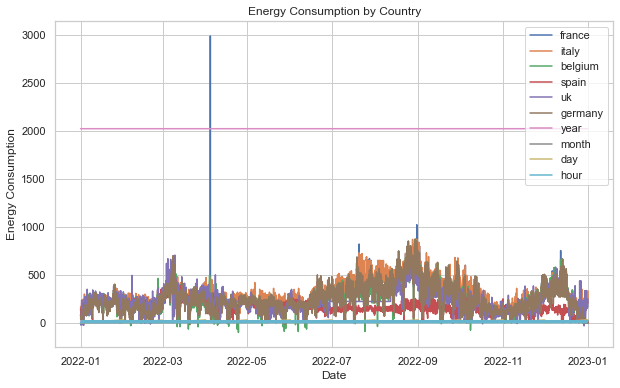

In [19]:
# plot the energy consumption for each country over time
plt.figure(figsize=(10, 6))
for country in df.columns:
    plt.plot(df.index, df[country], label=country)
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption by Country')
plt.legend()
plt.show()

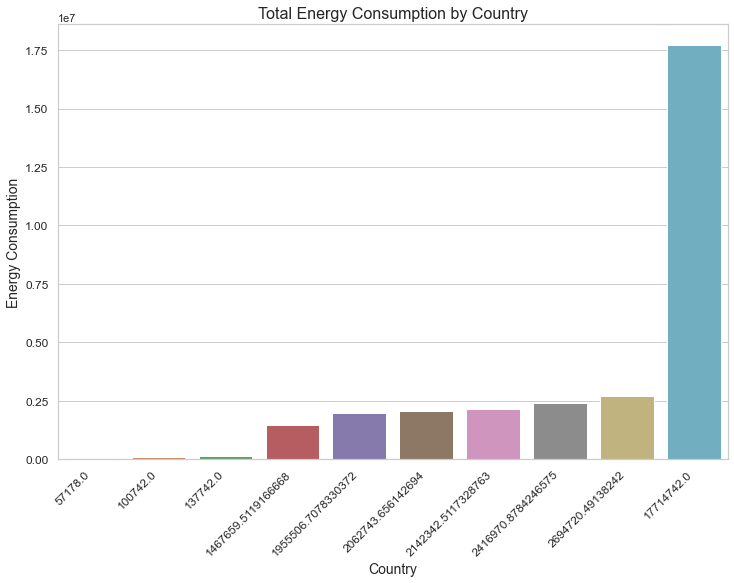

In [20]:
# create a bar chart to compare energy consumption across countries

plt.figure(figsize=(12, 8))
sns.barplot(data=df.sum(), x=df.sum().index, y=df.sum().values)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Energy Consumption', fontsize=14)
plt.title('Total Energy Consumption by Country', fontsize=16)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.show()

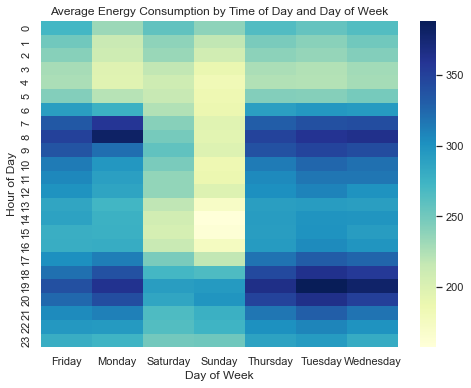

In [21]:
# create a heatmap to show consumption patterns by time of day and day of week
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['day_of_week_name'] = df.index.day_name()
heatmap_df = df.pivot_table(index='hour', columns='day_of_week_name', values='france', aggfunc='mean')
plt.figure(figsize=(8, 6))
sns.heatmap(data=heatmap_df, cmap='YlGnBu')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.title('Average Energy Consumption by Time of Day and Day of Week')
plt.show()

C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


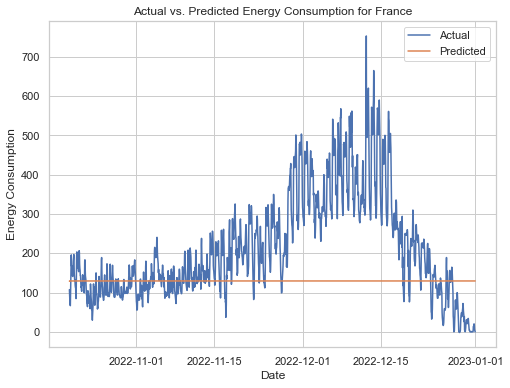

In [22]:
# split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# fit an ARIMA model to the training data
model = ARIMA(train_data['france'], order=(1,1,1))
model_fit = model.fit()

# make predictions on the test data using the fitted model
France_predictions = model_fit.predict(start=len(train_data), end=len(df)-1, typ='levels')

# plot the actual and predicted energy consumption for France
plt.figure(figsize=(8, 6))
plt.plot(test_data.index, test_data['france'], label='Actual')
plt.plot(test_data.index, France_predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Actual vs. Predicted Energy Consumption for France')
plt.legend()
plt.show()

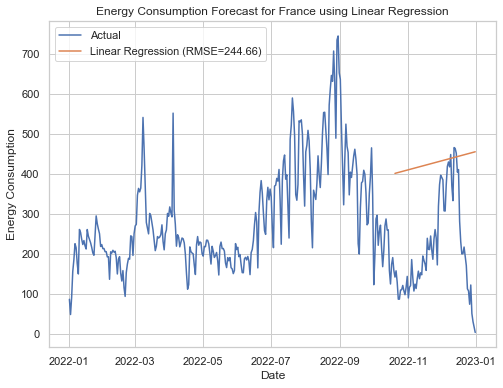

In [23]:
# resample the data to daily frequency and compute the daily mean
df_daily = df.resample('D').mean()

# split the data into training and testing sets
train_size = int(len(df_daily) * 0.8)
train_data, test_data = df_daily[:train_size], df_daily[train_size:]

# create a linear regression model and fit it to the training data
lr_model = LinearRegression()
X_train = np.arange(len(train_data)).reshape((-1, 1))
y_train = train_data['france'].values.reshape((-1, 1))
lr_model.fit(X_train, y_train)

# make predictions for the test data using the linear regression model
X_test = np.arange(len(train_data), len(df_daily)).reshape((-1, 1))
y_pred_lr = lr_model.predict(X_test)

# compute the root mean squared error of the linear regression model
rmse_lr = np.sqrt(mean_squared_error(test_data['france'].values, y_pred_lr))

# plot the linear regression model's predictions for Spain
plt.figure(figsize=(8, 6))
plt.plot(df_daily.index, df_daily['france'], label='Actual')
plt.plot(test_data.index, y_pred_lr, label=f'Linear Regression (RMSE={rmse_lr:.2f})')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Forecast for France using Linear Regression')
plt.legend()
plt.show()

C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


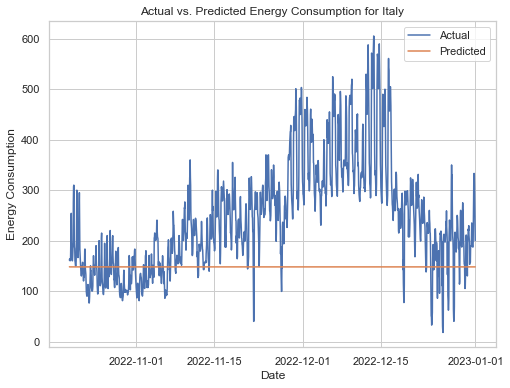

In [24]:
# split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# fit an ARIMA model to the training data
model = ARIMA(train_data['italy'], order=(1,1,1))
model_fit = model.fit()

# make predictions on the test data using the fitted model
Italy_predictions = model_fit.predict(start=len(train_data), end=len(df)-1, typ='levels')

# plot the actual and predicted energy consumption for Italy
plt.figure(figsize=(8, 6))
plt.plot(test_data.index, test_data['italy'], label='Actual')
plt.plot(test_data.index, Italy_predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Actual vs. Predicted Energy Consumption for Italy')
plt.legend()
plt.show()

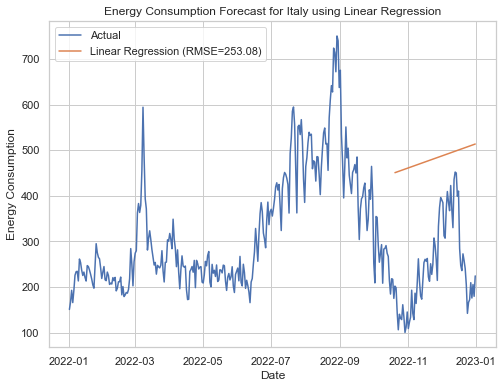

In [25]:
# resample the data to daily frequency and compute the daily mean
df_daily = df.resample('D').mean()

# split the data into training and testing sets
train_size = int(len(df_daily) * 0.8)
train_data, test_data = df_daily[:train_size], df_daily[train_size:]

# create a linear regression model and fit it to the training data
lr_model = LinearRegression()
X_train = np.arange(len(train_data)).reshape((-1, 1))
y_train = train_data['italy'].values.reshape((-1, 1))
lr_model.fit(X_train, y_train)

# make predictions for the test data using the linear regression model
X_test = np.arange(len(train_data), len(df_daily)).reshape((-1, 1))
y_pred_lr = lr_model.predict(X_test)

# compute the root mean squared error of the linear regression model
rmse_lr = np.sqrt(mean_squared_error(test_data['italy'].values, y_pred_lr))

# plot the linear regression model's predictions for Spain
plt.figure(figsize=(8, 6))
plt.plot(df_daily.index, df_daily['italy'], label='Actual')
plt.plot(test_data.index, y_pred_lr, label=f'Linear Regression (RMSE={rmse_lr:.2f})')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Forecast for Italy using Linear Regression')
plt.legend()
plt.show()

C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


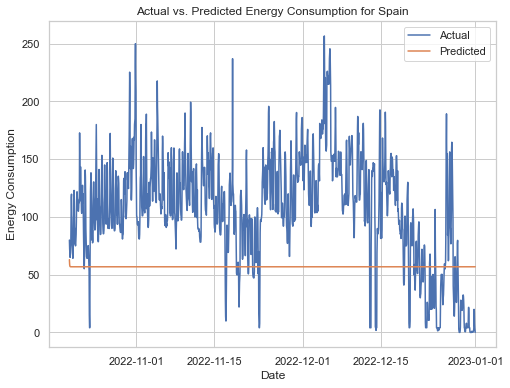

In [26]:
# split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# fit an ARIMA model to the training data
model = ARIMA(train_data['spain'], order=(1,1,1))
model_fit = model.fit()

# make predictions on the test data using the fitted model
Spain_predictions = model_fit.predict(start=len(train_data), end=len(df)-1, typ='levels')

# plot the actual and predicted energy consumption for Spain
plt.figure(figsize=(8, 6))
plt.plot(test_data.index, test_data['spain'], label='Actual')
plt.plot(test_data.index, Spain_predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Actual vs. Predicted Energy Consumption for Spain')
plt.legend()
plt.show()

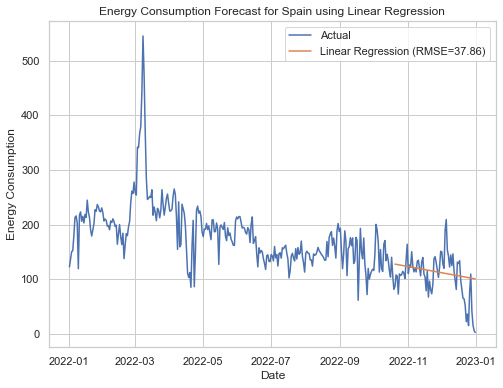

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

# resample the data to daily frequency and compute the daily mean
df_daily = df.resample('D').mean()

# split the data into training and testing sets
train_size = int(len(df_daily) * 0.8)
train_data, test_data = df_daily[:train_size], df_daily[train_size:]

# create a linear regression model and fit it to the training data
lr_model = LinearRegression()
X_train = np.arange(len(train_data)).reshape((-1, 1))
y_train = train_data['spain'].values.reshape((-1, 1))
lr_model.fit(X_train, y_train)

# make predictions for the test data using the linear regression model
X_test = np.arange(len(train_data), len(df_daily)).reshape((-1, 1))
y_pred_lr = lr_model.predict(X_test)

# compute the root mean squared error of the linear regression model
rmse_lr = np.sqrt(mean_squared_error(test_data['spain'].values, y_pred_lr))

# plot the linear regression model's predictions for Spain
plt.figure(figsize=(8, 6))
plt.plot(df_daily.index, df_daily['spain'], label='Actual')
plt.plot(test_data.index, y_pred_lr, label=f'Linear Regression (RMSE={rmse_lr:.2f})')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Forecast for Spain using Linear Regression')
plt.legend()
plt.show()

C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


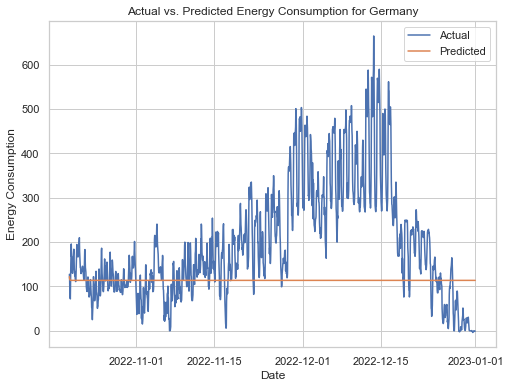

In [28]:
# split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# fit an ARIMA model to the training data
model = ARIMA(train_data['germany'], order=(1,1,1))
model_fit = model.fit()

# make predictions on the test data using the fitted model
Germany_predictions = model_fit.predict(start=len(train_data), end=len(df)-1, typ='levels')

# plot the actual and predicted energy consumption for Germany
plt.figure(figsize=(8, 6))
plt.plot(test_data.index, test_data['germany'], label='Actual')
plt.plot(test_data.index, Germany_predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Actual vs. Predicted Energy Consumption for Germany')
plt.legend()
plt.show()

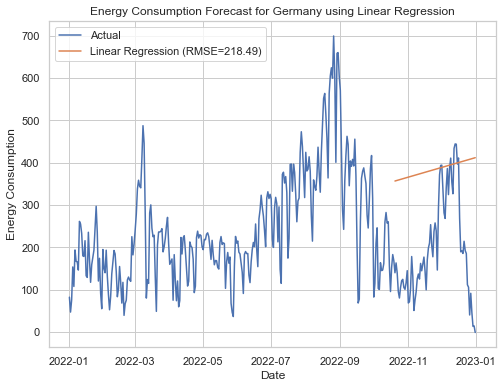

In [29]:
# resample the data to daily frequency and compute the daily mean
df_daily = df.resample('D').mean()

# split the data into training and testing sets
train_size = int(len(df_daily) * 0.8)
train_data, test_data = df_daily[:train_size], df_daily[train_size:]

# create a linear regression model and fit it to the training data
lr_model = LinearRegression()
X_train = np.arange(len(train_data)).reshape((-1, 1))
y_train = train_data['germany'].values.reshape((-1, 1))
lr_model.fit(X_train, y_train)

# make predictions for the test data using the linear regression model
X_test = np.arange(len(train_data), len(df_daily)).reshape((-1, 1))
y_pred_lr = lr_model.predict(X_test)

# compute the root mean squared error of the linear regression model
rmse_lr = np.sqrt(mean_squared_error(test_data['germany'].values, y_pred_lr))

# plot the linear regression model's predictions for Spain
plt.figure(figsize=(8, 6))
plt.plot(df_daily.index, df_daily['germany'], label='Actual')
plt.plot(test_data.index, y_pred_lr, label=f'Linear Regression (RMSE={rmse_lr:.2f})')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Forecast for Germany using Linear Regression')
plt.legend()
plt.show()

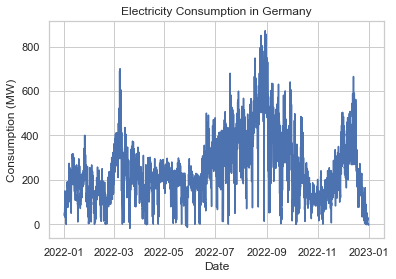

C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                germany   No. Observations:                 8761
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -41353.258
Date:                Tue, 11 Apr 2023   AIC                          82712.515
Time:                        03:55:52   BIC                          82733.749
Sample:                             0   HQIC                         82719.750
                               - 8761                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4661      0.013     37.176      0.000       0.442       0.491
ma.L1          0.0884      0.014      6.193      0.000       0.060       0.116
sigma2       737.6285      5.592    131.911      0.0

In [30]:
# Extract the Germany electricity consumption data
germany_data = df[['germany']]

# Plot the Germany electricity consumption data
plt.plot(germany_data)
plt.title('Electricity Consumption in Germany')
plt.xlabel('Date')
plt.ylabel('Consumption (MW)')
plt.show()

# Fit an ARIMA(1,1,1) model to the Germany electricity consumption data
model = ARIMA(germany_data, order=(1,1,1))
results = model.fit()

# Print a summary of the model's parameters and diagnostics
print(results.summary())

In [31]:
germany_data = df[['germany']]

# Split the Germany data into a training set and a test set
train_data = germany_data[:-24]
test_data = germany_data[-24:]

# Fit an ARIMA(1,1,1) model to the Germany electricity consumption training data
model = ARIMA(train_data, order=(1,1,1))
results = model.fit()

# Generate forecasts for the Germany electricity consumption test data
forecast = results.forecast(steps=24)

# Calculate the mean absolute error (MAE) and mean squared error (MSE) of the forecasts
mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')

C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MAE: 0.81
MSE: 1.35


C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


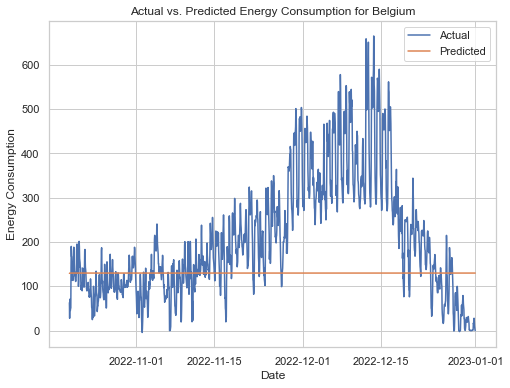

In [32]:
# split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# fit an ARIMA model to the training data
model = ARIMA(train_data['belgium'], order=(1,1,1))
model_fit = model.fit()

# make predictions on the test data using the fitted model
Belgium_predictions = model_fit.predict(start=len(train_data), end=len(df)-1, typ='levels')

# plot the actual and predicted energy consumption for Belgium 
plt.figure(figsize=(8, 6))
plt.plot(test_data.index, test_data['belgium'], label='Actual')
plt.plot(test_data.index, Belgium_predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Actual vs. Predicted Energy Consumption for Belgium')
plt.legend()
plt.show()

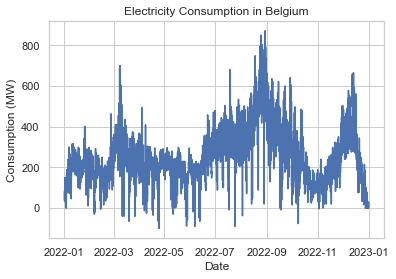

C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                belgium   No. Observations:                 8761
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -43781.819
Date:                Tue, 11 Apr 2023   AIC                          87569.637
Time:                        03:55:55   BIC                          87590.871
Sample:                             0   HQIC                         87576.872
                               - 8761                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3322      0.023     14.154      0.000       0.286       0.378
ma.L1         -0.0503      0.024     -2.087      0.037      -0.098      -0.003
sigma2      1284.8934      9.886    129.970      0.0

In [33]:
# Extract the Belgium electricity consumption data
belgium_data = df[['belgium']]

# Plot the Belgium electricity consumption data
plt.plot(belgium_data)
plt.title('Electricity Consumption in Belgium')
plt.xlabel('Date')
plt.ylabel('Consumption (MW)')
plt.show()

# Fit an ARIMA(1,1,1) model to the Belgium electricity consumption data
model = ARIMA(belgium_data, order=(1,1,1))
results = model.fit()

# Print a summary of the model's parameters and diagnostics
print(results.summary())

C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


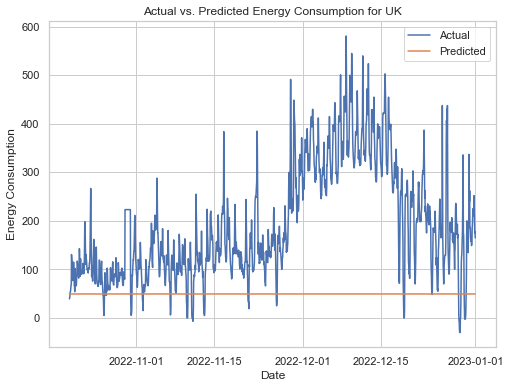

In [34]:
# split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# fit an ARIMA model to the training data
model = ARIMA(train_data['uk'], order=(1,1,1))
model_fit = model.fit()

# make predictions on the test data using the fitted model
UK_predictions = model_fit.predict(start=len(train_data), end=len(df)-1, typ='levels')

# plot the actual and predicted energy consumption for UK
plt.figure(figsize=(8, 6))
plt.plot(test_data.index, test_data['uk'], label='Actual')
plt.plot(test_data.index, UK_predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Actual vs. Predicted Energy Consumption for UK')
plt.legend()
plt.show()

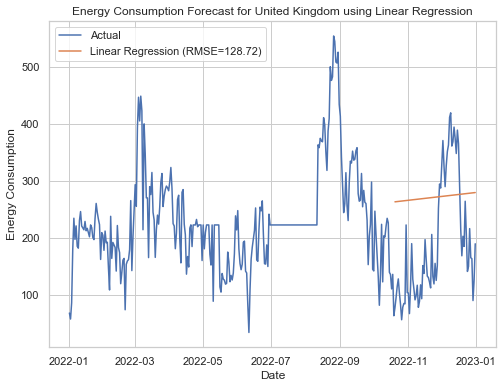

In [35]:
# resample the data to daily frequency and compute the daily mean
df_daily = df.resample('D').mean()

# split the data into training and testing sets
train_size = int(len(df_daily) * 0.8)
train_data, test_data = df_daily[:train_size], df_daily[train_size:]

# create a linear regression model and fit it to the training data
lr_model = LinearRegression()
X_train = np.arange(len(train_data)).reshape((-1, 1))
y_train = train_data['uk'].values.reshape((-1, 1))
lr_model.fit(X_train, y_train)

# make predictions for the test data using the linear regression model
X_test = np.arange(len(train_data), len(df_daily)).reshape((-1, 1))
y_pred_lr = lr_model.predict(X_test)

# compute the root mean squared error of the linear regression model
rmse_lr = np.sqrt(mean_squared_error(test_data['uk'].values, y_pred_lr))

# plot the linear regression model's predictions for Spain
plt.figure(figsize=(8, 6))
plt.plot(df_daily.index, df_daily['uk'], label='Actual')
plt.plot(test_data.index, y_pred_lr, label=f'Linear Regression (RMSE={rmse_lr:.2f})')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Forecast for United Kingdom using Linear Regression')
plt.legend()
plt.show()

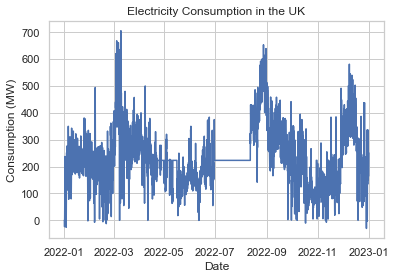

C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                     uk   No. Observations:                 8761
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -40472.457
Date:                Tue, 11 Apr 2023   AIC                          80950.914
Time:                        03:55:58   BIC                          80972.148
Sample:                             0   HQIC                         80958.149
                               - 8761                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2461      0.021     11.797      0.000       0.205       0.287
ma.L1          0.0799      0.021      3.891      0.000       0.040       0.120
sigma2       603.7671      3.891    155.172      0.0

In [36]:
# Extract the UK electricity consumption data
uk_data = df[['uk']]

# Plot the UK electricity consumption data
plt.plot(uk_data)
plt.title('Electricity Consumption in the UK')
plt.xlabel('Date')
plt.ylabel('Consumption (MW)')
plt.show()

# Fit an ARIMA(1,1,1) model to the UK electricity consumption data
model = ARIMA(uk_data, order=(1,1,1))
results = model.fit()

# Print a summary of the model's parameters and diagnostics
print(results.summary())

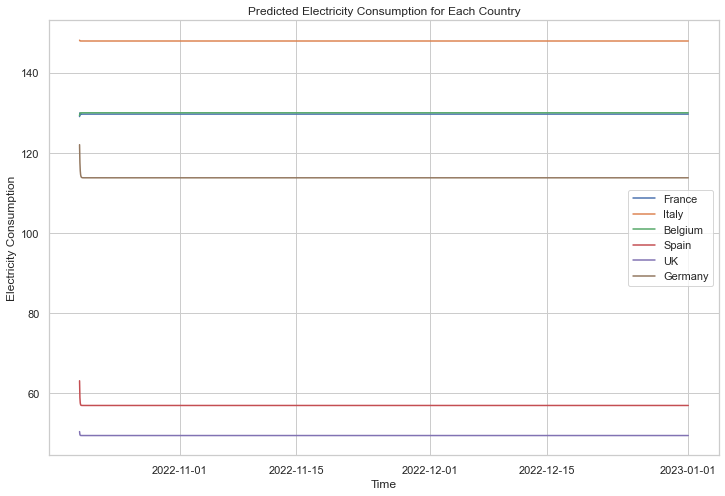

In [37]:
# Set the figure size
plt.figure(figsize=(12,8))

# Plot the predicted electricity consumption for each country
plt.plot(France_predictions, label='France')
plt.plot(Italy_predictions, label='Italy')
plt.plot(Belgium_predictions, label='Belgium')
plt.plot(Spain_predictions, label='Spain')
plt.plot(UK_predictions, label='UK')
plt.plot(Germany_predictions, label='Germany')

# Set the title and axis labels
plt.title('Predicted Electricity Consumption for Each Country')
plt.xlabel('Time')
plt.ylabel('Electricity Consumption')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [38]:
pip install --upgrade statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
df.head()

,france,italy,belgium,spain,uk,germany,year,month,day,hour,day_of_week,day_of_week_name
datetime,,,,,,,,,,,,
2022-01-01 00:00:00,89.06,170.28,82.02,145.86,0.27,50.05,2022,1,1,0,5,Saturday
2022-01-01 01:00:00,78.48,155.72,67.07,114.90,-0.01,41.33,2022,1,1,1,5,Saturday
2022-01-01 02:00:00,85.16,147.09,75.11,113.87,0.27,43.22,2022,1,1,2,5,Saturday
2022-01-01 03:00:00,50.00,91.00,50.91,97.80,-0.01,45.46,2022,1,1,3,5,Saturday
2022-01-01 04:00:00,37.67,104.00,37.67,97.80,-0.01,37.67,2022,1,1,4,5,Saturday


In [40]:
df = df.drop(columns=['day_of_week_name'])

In [41]:
#Developing hourly price forecasting models for France 

C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Henry Morgan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 france   No. Observations:                 8761
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -45594.502
Date:                Tue, 11 Apr 2023   AIC                          91199.005
Time:                        03:56:11   BIC                          91234.394
Sample:                             0   HQIC                         91211.063
                               - 8761                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3836      0.004     91.605      0.000       0.375       0.392
ar.L2          0.2057      0.007     29.840      0.000       0.192       0.219
ma.L1         -0.2747      0.007    -41.546      0.0

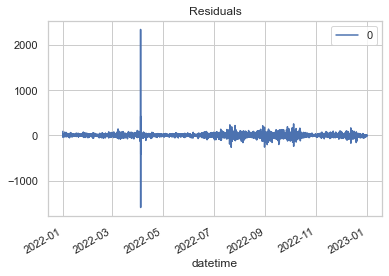

In [42]:
# Split the data into train and test sets
train_data = df.loc[:'2022-12-31']
test_data = df.loc['2023-01-01':]

# Fit an ARIMA model to the hourly energy prices
arima_model = ARIMA(train_data['france'], order=(2, 1, 2))
arima_result = arima_model.fit()

# Print the model summary
print(arima_result.summary())

# Plot the residuals
residuals = pd.DataFrame(arima_result.resid)
residuals.plot(title='Residuals')
plt.show()

In [43]:
#Building energy pricing models for business planning and strategy with hourly granularity

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
# Define the features and target variable
X = df[['france', 'italy', 'belgium', 'spain', 'uk', 'germany', 'hour', 'day_of_week']]
y = df['france']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the GBM model
gbm = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)

# Train the model on the training set
gbm.fit(X_train, y_train)

# Predict the prices on the testing set
y_pred = gbm.predict(X_test)

# Evaluate the model performance using mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.31302116772607186


In [45]:
#Developing hourly price forecasting models for France 

Mean squared error: 1.04


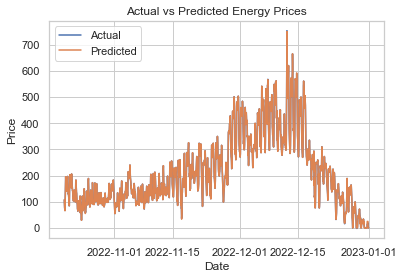

In [46]:
from sklearn.tree import DecisionTreeRegressor
# Create a list of features to use in the model
features = ['france', 'italy', 'belgium', 'spain', 'uk', 'germany', 'year', 'month', 'day', 'hour', 'day_of_week']

# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train_data, test_data = df[:train_size], df[train_size:]

# Create a decision tree model
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
tree_model.fit(train_data[features], train_data['france'])

# Use the model to make predictions on the testing data
predictions = tree_model.predict(test_data[features])

# Calculate the mean squared error of the predictions
mse = mean_squared_error(test_data['france'], predictions)

# Print the mean squared error
print(f"Mean squared error: {mse:.2f}")

# Visualize the actual and predicted price values using a line plot
plt.plot(test_data.index, test_data['france'], label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Energy Prices')
plt.legend()
plt.show()

In [47]:
# the hourly price data for each country to get an idea of the general trend and seasonality of the data:

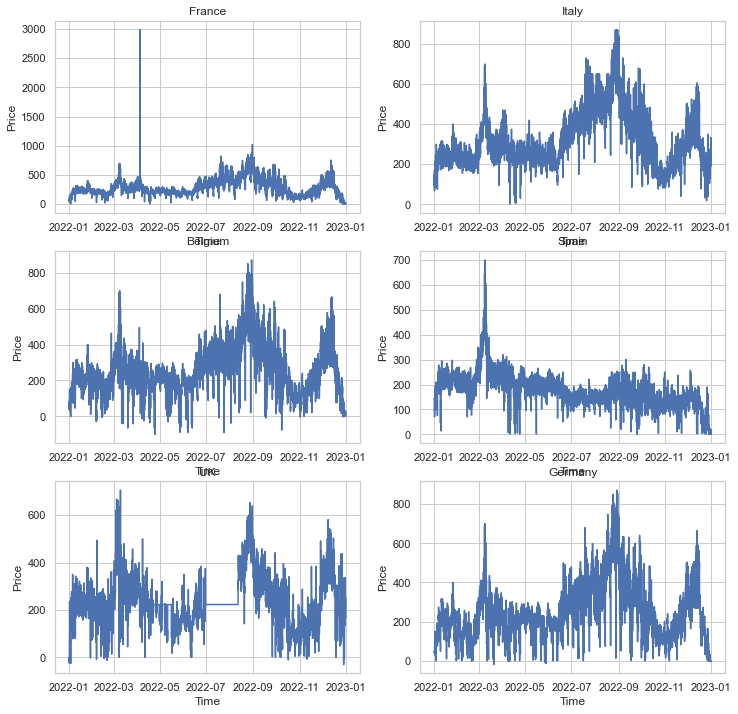

In [48]:
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

axs[0, 0].plot(df['france'])
axs[0, 0].set_title('France')
axs[0, 1].plot(df['italy'])
axs[0, 1].set_title('Italy')
axs[1, 0].plot(df['belgium'])
axs[1, 0].set_title('Belgium')
axs[1, 1].plot(df['spain'])
axs[1, 1].set_title('Spain')
axs[2, 0].plot(df['uk'])
axs[2, 0].set_title('UK')
axs[2, 1].plot(df['germany'])
axs[2, 1].set_title('Germany')

for ax in axs.flat:
    ax.set(xlabel='Time', ylabel='Price')
    
plt.show()

In [49]:
for country in df.columns:
    print(country)
    print('Minimum price: ', np.min(df[country]))
    print('Maximum price: ', np.max(df[country]))
    print('Mean price: ', np.mean(df[country]))
    print('Median price: ', np.median(df[country]))
    print('Standard deviation: ', np.std(df[country]))
    print('\n')

france
Minimum price:  -1.44
Maximum price:  2987.78
Mean price:  275.8784246575337
Median price:  239.34
Standard deviation:  145.80907630201395


italy
Minimum price:  1.0
Maximum price:  871.0
Mean price:  307.5813824200907
Median price:  266.68
Standard deviation:  136.94422233838057


belgium
Minimum price:  -100.0
Maximum price:  871.0
Mean price:  244.53173287671254
Median price:  219.83
Standard deviation:  134.64193567839524


spain
Minimum price:  0.0
Maximum price:  700.0
Mean price:  167.5219166666676
Median price:  163.55
Standard deviation:  69.43342268658606


uk
Minimum price:  -30.0
Maximum price:  705.47
Mean price:  223.20587921847647
Median price:  223.20587921847246
Standard deviation:  103.20421394341525


germany
Minimum price:  -19.04
Maximum price:  871.0
Mean price:  235.44614269406293
Median price:  208.37
Standard deviation:  142.79310737151727


year
Minimum price:  2022
Maximum price:  2022
Mean price:  2022.0
Median price:  2022.0
Standard deviation:  0.0

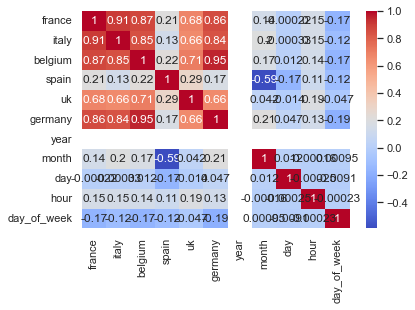

In [50]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()